In [46]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd

cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols',
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
         'Hue', 'OD280/OD315', 'Proline']

D =pd.read_csv("drive/My Drive/wine.csv", names=cols)
D.head()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [48]:
unique = pd.unique(D['Class'])
print(unique)
n = len(unique)

print("No.of.unique values :", n)

[1 2 0]
No.of.unique values : 3


In [49]:
Y = D['Class']
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
173    0
174    0
175    0
176    0
177    0
Name: Class, Length: 178, dtype: int64


In [50]:
X = D.loc[:, D.columns != 'Class']
print(X.head())

   Alcohol  MalicAcid   Ash  AlcalinityOfAsh  Magnesium  TotalPhenols  \
0    14.23       1.71  2.43             15.6        127          2.80   
1    13.20       1.78  2.14             11.2        100          2.65   
2    13.16       2.36  2.67             18.6        101          2.80   
3    14.37       1.95  2.50             16.8        113          3.85   
4    13.24       2.59  2.87             21.0        118          2.80   

   Flavanoids  NonflavanoidPhenols  Proanthocyanins  ColorIntensity   Hue  \
0        3.06                 0.28             2.29            5.64  1.04   
1        2.76                 0.26             1.28            4.38  1.05   
2        3.24                 0.30             2.81            5.68  1.03   
3        3.49                 0.24             2.18            7.80  0.86   
4        2.69                 0.39             1.82            4.32  1.04   

   OD280/OD315  Proline  
0         3.92     1065  
1         3.40     1050  
2         3.17     1

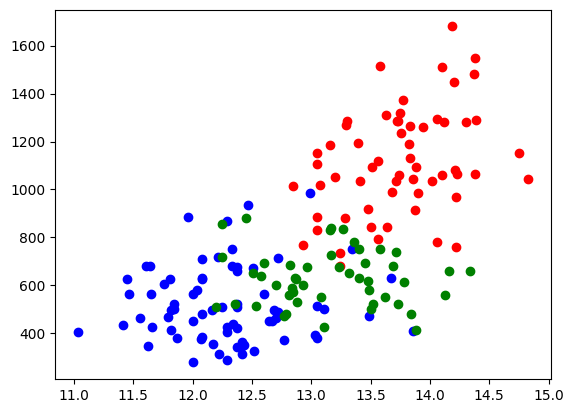

In [51]:
import matplotlib.pyplot as plt

plt.scatter(D['Alcohol'].where(D['Class']==1), D['Proline'].where(D['Class']==1), color = 'red')
plt.scatter(D['Alcohol'].where(D['Class']==2), D['Proline'].where(D['Class']==2), color = 'blue')
plt.scatter(D['Alcohol'].where(D['Class']==0), D['Proline'].where(D['Class']==0), color = 'green')

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X.to_numpy(), Y.to_numpy(), test_size=0.33, random_state=42)

In [53]:
print(X_train[0:5])
print(Y_train[0:5])

[[1.371e+01 1.860e+00 2.360e+00 1.660e+01 1.010e+02 2.610e+00 2.880e+00
  2.700e-01 1.690e+00 3.800e+00 1.110e+00 4.000e+00 1.035e+03]
 [1.388e+01 5.040e+00 2.230e+00 2.000e+01 8.000e+01 9.800e-01 3.400e-01
  4.000e-01 6.800e-01 4.900e+00 5.800e-01 1.330e+00 4.150e+02]
 [1.229e+01 1.410e+00 1.980e+00 1.600e+01 8.500e+01 2.550e+00 2.500e+00
  2.900e-01 1.770e+00 2.900e+00 1.230e+00 2.740e+00 4.280e+02]
 [1.221e+01 1.190e+00 1.750e+00 1.680e+01 1.510e+02 1.850e+00 1.280e+00
  1.400e-01 2.500e+00 2.850e+00 1.280e+00 3.070e+00 7.180e+02]
 [1.282e+01 3.370e+00 2.300e+00 1.950e+01 8.800e+01 1.480e+00 6.600e-01
  4.000e-01 9.700e-01 1.026e+01 7.200e-01 1.750e+00 6.850e+02]]
[1 0 2 2 0]


In [54]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self, X_train, y_train):
        # need to convert float64 to float32 else
        # will get the following error
        # RuntimeError: expected scalar type Double but found Float
        self.X = torch.from_numpy(X_train.astype(np.float32))
        # need to convert float64 to Long else
        # will get the following error
        # RuntimeError: expected scalar type Long but found Float
        self.y = torch.from_numpy(y_train).type(torch.LongTensor)
        self.len = self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.len

In [55]:
traindata = Data(X_train, Y_train)

In [56]:
print(traindata[0:5])

(tensor([[1.3710e+01, 1.8600e+00, 2.3600e+00, 1.6600e+01, 1.0100e+02, 2.6100e+00,
         2.8800e+00, 2.7000e-01, 1.6900e+00, 3.8000e+00, 1.1100e+00, 4.0000e+00,
         1.0350e+03],
        [1.3880e+01, 5.0400e+00, 2.2300e+00, 2.0000e+01, 8.0000e+01, 9.8000e-01,
         3.4000e-01, 4.0000e-01, 6.8000e-01, 4.9000e+00, 5.8000e-01, 1.3300e+00,
         4.1500e+02],
        [1.2290e+01, 1.4100e+00, 1.9800e+00, 1.6000e+01, 8.5000e+01, 2.5500e+00,
         2.5000e+00, 2.9000e-01, 1.7700e+00, 2.9000e+00, 1.2300e+00, 2.7400e+00,
         4.2800e+02],
        [1.2210e+01, 1.1900e+00, 1.7500e+00, 1.6800e+01, 1.5100e+02, 1.8500e+00,
         1.2800e+00, 1.4000e-01, 2.5000e+00, 2.8500e+00, 1.2800e+00, 3.0700e+00,
         7.1800e+02],
        [1.2820e+01, 3.3700e+00, 2.3000e+00, 1.9500e+01, 8.8000e+01, 1.4800e+00,
         6.6000e-01, 4.0000e-01, 9.7000e-01, 1.0260e+01, 7.2000e-01, 1.7500e+00,
         6.8500e+02]]), tensor([1, 0, 2, 2, 0]))


In [57]:
# Load the trainingdata using the DataLoader

batch_size = 2
trainloader = DataLoader(traindata, batch_size=batch_size, shuffle=True, num_workers=2)

In [58]:
# Build our neural network classifier

import torch.nn as nn
# number of features (len of X cols)
input_dim = 13
# number of hidden layers
hidden_layers = 25
# number of classes (unique of y)
output_dim = 3

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_layers)
        self.linear2 = nn.Linear(hidden_layers, hidden_layers)

        #modification
        self.linear3 = nn.Linear(hidden_layers, 15)
        self.linear4 = nn.Linear(15, 10)
        self.linear5 = nn.Linear(10, 5)

        self.linear6 = nn.Linear(5, output_dim)

    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        x = self.linear3(x)
        x = self.linear4(x)
        x = self.linear5(x)
        x = self.linear6(x)

        return x

In [59]:
# initilize the classifier

clf = Network()

In [60]:
# check the classification parameters

print(clf.parameters)

<bound method Module.parameters of Network(
  (linear1): Linear(in_features=13, out_features=25, bias=True)
  (linear2): Linear(in_features=25, out_features=25, bias=True)
  (linear3): Linear(in_features=25, out_features=15, bias=True)
  (linear4): Linear(in_features=15, out_features=10, bias=True)
  (linear5): Linear(in_features=10, out_features=5, bias=True)
  (linear6): Linear(in_features=5, out_features=3, bias=True)
)>


In [61]:
# Defining the loss functions

lr=0.0001

#criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(clf.parameters(), lr)

In [62]:
# training the classifier

epochs = 500
losses = []

for epoch in range(epochs):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # set optimizer to zero grad to remove previous epoch gradients
        optimizer.zero_grad()
        # forward propagation
        outputs = clf(inputs)
        #print(outputs)
        #print(labels)
        loss = criterion(outputs, labels)
        #losses.append(loss.item())
        # backward propagation
        loss.backward()
        # optimize
        optimizer.step()
        running_loss += loss.item()
    losses.append(running_loss)
# display statistics

    #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.5f}')

In [63]:
len(losses)

500

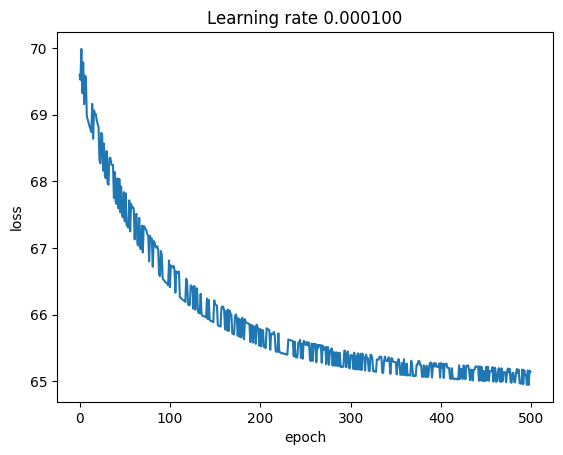

In [64]:
# plot the loss and see how the model is training over each epoch

import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(lr))
plt.show()

In [65]:
# Check the model performance for a test data manually

test_sample = np.array([1, 14])

sample = torch.from_numpy(test_sample.astype(np.float32))

print(sample)

pred = clf(sample)

print(pred)

tensor([ 1., 14.])


RuntimeError: ignored